# Blue Whale Heart Rates

By how much do blue whale heart rates change when they dive down to find food? 

The file `blue-whale-heart-rates.csv` contains heart rate data (measured in beats per minute) for blue whales. The data captures the dynamics of their heart rates as they dive over one hundred meters deep to forage for food. The heart rate measurements are taken approximately every 10 seconds during 8 separate dives.

### Dive Phases
The data records the heart rates corresponding to different dive states:
1. Descent: The whale begins its dive, descending into the depths.
2. Lunging: The whale opens its mouth and lunges upward, engulfing prey and water.
3. Filtering: After lunging, the whale sinks slightly and filters out water to retain food.
4. Ascent: The whale returns to the surface to breathe, marking the end of a dive.
5.  Surface: The blue whale is now on the surface (upper 5 meters)

The lunging and filtering process may occur multiple times on a single dive. The next dive cycle begins with another descent.

In [ ]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'blue-whale-heart-rates.csv'.

# from google.colab import files
# uploaded = files.upload()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('blue-whale-heart-rates.csv')
df.head()


,timestamp,heart_rate,dive_id,dive_phase
0,8/27/18 17:10:10,NaN,2,descent
1,8/27/18 17:10:22,5.24,2,descent
2,8/27/18 17:10:31,6.55,2,descent
3,8/27/18 17:10:40,NaN,2,descent
4,8/27/18 17:10:48,NaN,2,descent


### Project Ideas

#### Warmup
Calculate the average heart rates for each dive phase.

#### Challenge
Investigate the relationship between dive duration and the maximum heart rate at the surface following the dive.

1. Data Preparation:
	- Convert the `timestamp` column to datetime format.

2. Calculate Dive Duration:
	- For each `dive_id`, identify the earliest timestamp for the descent phase.
	- For each `dive_id`, find the latest timestamp for the ascent phase.
	- Compute the `dive_duration` by subtracting the start of the descent from the end of the ascent, then convert this duration to minutes (`dt.total_seconds() / 60`).
	- Store the results in a new dataframe with 2 columns: `dive_id` and `dive_duration`.

3. Determine Maximum Surface Heart Rate:
	- Identify the maximum heart rate recorded at the surface after each dive.
	- Store the results in a new dataframe with 2 columns: `dive_id` and `max_surface_heart_rate`

4. Merge DataFrames:
	- Merge the dive duration and max surface heart rate dataframes.
	
5.	Visualize the Data:
	- Generate a scatter plot with dive duration on the x-axis and maximum surface heart rate on the y-axis to illustrate their relationship.

In [3]:
# YOUR CODE HERE (add additional cells as needed)
# Load and Prepare the Data

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("blue-whale-heart-rates.csv")

# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%y %H:%M:%S', errors='coerce')

# Drop rows with missing timestamps or heart_rate (if needed)
df = df.dropna(subset=["timestamp"])


In [4]:
# Average Heart Rate per Dive Phase (Warmup)
# Drop NaN heart_rate first
df_hr = df.dropna(subset=["heart_rate"])

# Calculate average heart rate per dive_phase
avg_hr_by_phase = df_hr.groupby("dive_phase")["heart_rate"].mean()
print("Average Heart Rate per Dive Phase:\n", avg_hr_by_phase)

Average Heart Rate per Dive Phase:
 dive_phase
ascent     20.433318
descent     7.473607
filter      6.561053
lunge       9.773529
surface    32.546041
Name: heart_rate, dtype: float64


In [10]:
# Calculate Dive Duration

# Get descent start time per dive
descent_start = df[df["dive_phase"] == "descent"].groupby("dive_id")["timestamp"].min()

# Get ascent end time per dive
ascent_end = df[df["dive_phase"] == "ascent"].groupby("dive_id")["timestamp"].max()

# Merge and compute duration
dive_duration_df = pd.merge(descent_start, ascent_end, on="dive_id", suffixes=("_start", "_end"))
dive_duration_df["dive_duration"] = (dive_duration_df["timestamp_end"] - dive_duration_df["timestamp_start"]).dt.total_seconds() / 60
dive_duration_df = dive_duration_df[["dive_duration"]].reset_index()

print(dive_duration_df[["dive_duration"]])

   dive_duration
0      12.433333
1      12.400000
2       9.000000
3       9.616667
4      11.216667
5      11.016667
6      16.400000
7      10.916667


In [6]:
# Determine Max Surface Heart Rate After Each Dive

# Filter surface phase and drop NaNs
surface_df = df[(df["dive_phase"] == "surface") & (df["heart_rate"].notna())]

# Get max heart rate per dive
max_surface_hr = surface_df.groupby("dive_id")["heart_rate"].max().reset_index()
max_surface_hr.columns = ["dive_id", "max_surface_heart_rate"]

In [7]:
# Merge Duration and Heart Rate

merged_df = pd.merge(dive_duration_df, max_surface_hr, on="dive_id")
print(merged_df.head())

   dive_id  dive_duration  max_surface_heart_rate
0        2      12.433333                   35.50
1        3      12.400000                   35.29
2        4       9.000000                   34.48
3        5       9.616667                   33.90
4        7      11.216667                   33.52


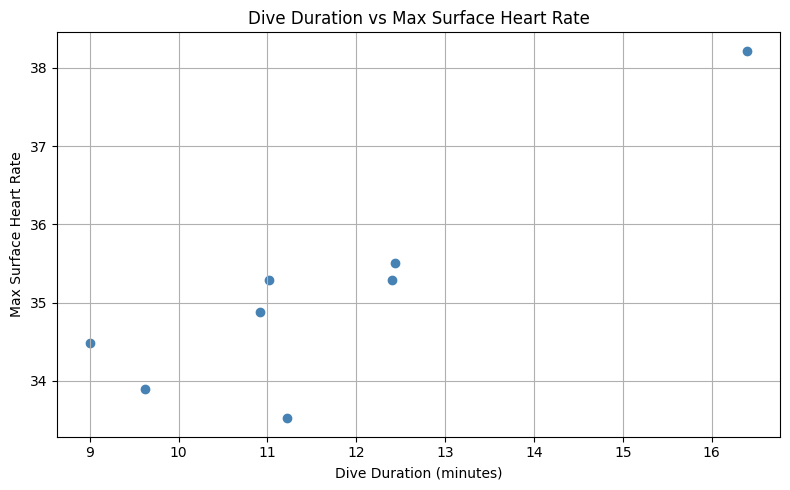

In [8]:
# Visualize: Scatter Plot

plt.figure(figsize=(8, 5))
plt.scatter(merged_df["dive_duration"], merged_df["max_surface_heart_rate"], color='steelblue')
plt.title("Dive Duration vs Max Surface Heart Rate")
plt.xlabel("Dive Duration (minutes)")
plt.ylabel("Max Surface Heart Rate")
plt.grid(True)
plt.tight_layout()
plt.show()